# Kaggle House Pricing Challenge Model

## Importing Libraries and Tools:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings

warnings.filterwarnings("ignore")

---
## I- Importing Data and Viewing:

In [3]:
df1 = pd.read_csv(r"C:\Users\tkara\Desktop\train.csv")
df1.shape

(1460, 81)

In [4]:
df2 = pd.read_csv(r"C:\Users\tkara\Desktop\test.csv")
df2.shape

(1459, 80)

In [5]:
sample_submission = pd.read_csv(r"C:\Users\tkara\Desktop\sample_submission.csv")

In [6]:
df = pd.concat([df1, df2]) # dataframes are combined

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

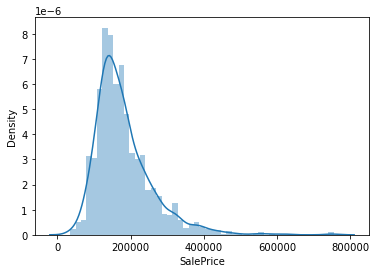

In [7]:
sns.distplot(df1.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

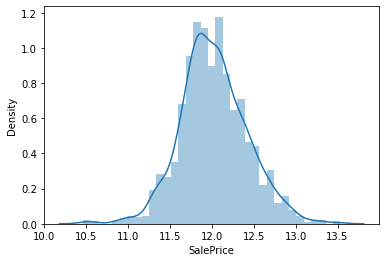

In [8]:
sns.distplot(np.log(df1.SalePrice + 1))

##### *The purpose of this treatment is to get better results in analysis by converting the "SalePrice" column. The natural logarithm was used to perform the transformation. Converting "SalePrice" values corrects a skewed distribution, resulting in better performance in regression analysis.*

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(21)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

In [10]:
df.shape

(2919, 81)

---
## Missing Values

<AxesSubplot:>

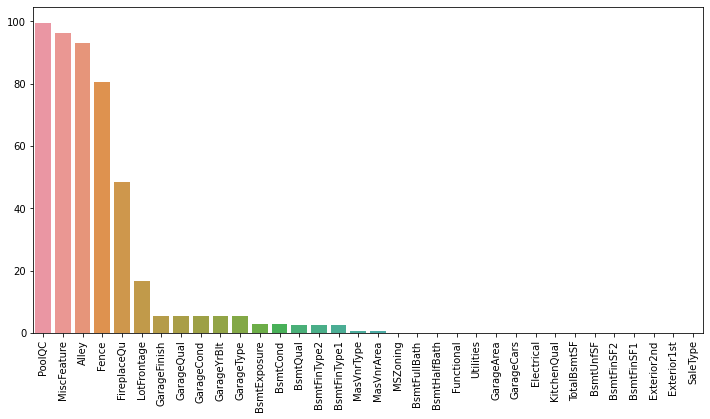

In [11]:
all_data = pd.concat((df1.drop(["SalePrice"], axis=1), df2))
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index, y=all_data_na)

In [12]:
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
Electrical         1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
BsmtUnfSF          1
dtype: int64

<AxesSubplot:>

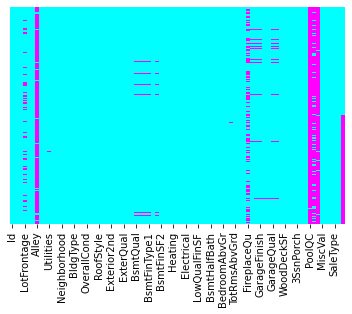

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="cool")

---
## II- Feature Evaluation And Analysis

### 1- PoolQC

#### As mentioned in the "Data Description", "NaN" values for "PoolQC" indicate no pool. However, if we check our data, we have rows where the value of the "PoolArea" property is not 0, although the "PoolQC" is "NaN".

In [14]:
df[df.PoolArea != 0][["PoolArea", "PoolQC"]]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
514,144,Ex
960,368,NaN
1043,444,NaN


---
### 2- MiscFeature

#### As mentioned in the "Data Description," the "NaN" values for the "MiscFeature" indicate that there are no miscellaneous features present. However, upon checking our data, we observe rows where the "MiscFeature" is present but the corresponding "MiscVal" is 0, and rows where there is no "MiscFeature" but the "MiscVal" is different from 0.

In [15]:
df[((df["MiscVal"] == 0) & pd.notna(df["MiscFeature"])) | ((df["MiscVal"] != 0) & pd.isna(df["MiscFeature"]))][["MiscFeature", "MiscVal"]]

,MiscFeature,MiscVal
873,Othr,0
1200,Shed,0
971,Shed,0
1089,NaN,17000


##### *Note: After a few attempts, I have come to understand that removing this feature leads to obtaining a better model.

---
### 3- Alley : 
#### As mentioned in the "Data Description," the "NaN" values for the "Alley" indicate that the corresponding row does not have an alley.

---
### 4- Fence:
#### As mentioned in the "Data Description," the "NaN" values for the "Fence" indicate that the corresponding row does not have an fence.

---
### 5- FireplaceQu:
#### As mentioned in the "Data Description," the "NaN" values for the "FireplaceQu" indicate that the corresponding row does not have an fireplace. As seen below, when compared with the "Fireplaces" feature, there are no rows that appear to be illogical:

In [16]:
(((df["Fireplaces"] == 0) & pd.notna(df["FireplaceQu"])) | ((df["Fireplaces"] != 0) & pd.isna(df["FireplaceQu"]))).any()

False

---
### 6- LotFrontage
#### It may be possible to fill it by associating it with LotConfig and Neighborhood, but if I keep it simple and fill it with a value of 0, I get good results.

---
### 7- Garage

In [17]:
garage_columns = [col for col in df.columns if col.startswith("Garage")]
garage_nuls = df[garage_columns].columns[df[garage_columns].isnull().any()]

df[garage_nuls].isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
GarageFinish    159
GarageQual      159
GarageCond      159
GarageType      157
GarageCars        1
GarageArea        1
dtype: int64

#### Garage: According to the "Data Description" file, missing values in the "GarageType", "GarageFinish", "GarageQual", and "GarageCond" features should be filled with "None". The "GarageYrBlt", "GarageCars", and "GarageArea" features should be filled with "0". However, there are some exceptional rows in the dataset where filling them in this manner is not applicable. In such cases, I will perform filling using the mode and mean values.

In [18]:
df[(df.GarageYrBlt.isnull()) & (df.GarageType.notnull())][["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


---
### 8- Basement
#### According to the "Data Description" , the "Bsmt" features should be filled with either "None" or "0". There are a few examples where it is not appropriate to fill in this way, but since it will be too complicated and does not affect the model much, I filled it this way.

In [19]:
df[(pd.notna(df["BsmtQual"]) & pd.isna(df["BsmtExposure"]))][["BsmtQual", "BsmtExposure"]]

,BsmtQual,BsmtExposure
948,Gd,NaN
27,Gd,NaN
888,Gd,NaN


In [20]:
df[(pd.notna(df["BsmtExposure"]) & pd.isna(df["BsmtCond"]))][["BsmtCond", "BsmtExposure"]]

,BsmtCond,BsmtExposure
580,NaN,Mn
725,NaN,No
1064,NaN,Av


In [21]:
df[(pd.isna(df["BsmtFinType2"]) & df.BsmtFinSF2 != 0)][["BsmtCond", "BsmtExposure"]]

,BsmtCond,BsmtExposure
332,TA,No


In [22]:
df[(pd.notna(df["BsmtCond"]) & pd.isna(df["BsmtQual"]))][["BsmtQual", "BsmtCond"]]

,BsmtQual,BsmtCond
757,NaN,Fa
758,NaN,TA


---
### 9- Utilities
#### There is almost no NoSeWa. Delete.

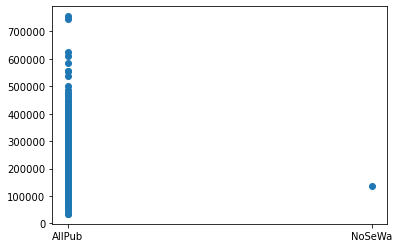

In [23]:
plt.scatter(df1.Utilities, df1.SalePrice)

### * *Note: Missing values for remaining features are filled with their own mode or mean values*

---

## III- Feature Engineering

### 1- Filling in exception rows:

In [24]:
# PoolQC
df2.loc[[960, 1043, 1139], "PoolQC"] = df["PoolQC"].mode()[0]

# Garage
df2.loc[[666,1116], "GarageYrBlt"] = df["GarageYrBlt"].mean()

df2.loc[[666,1116], "GarageFinish"] = df["GarageFinish"].mode()[0]

df2.loc[[1116], "GarageCars"] = df["GarageCars"].mode()[0]

df2.loc[[1116], "GarageArea"] = df["GarageArea"].mean

df2.loc[[666,1116], "GarageQual"] = df["GarageQual"].mode()[0]

df2.loc[[666,1116], "GarageCond"] = df["GarageCond"].mode()[0]

---
### 2- Dropping unnecessary features:

In [25]:
df = pd.concat([df1, df2])

In [26]:
df = df.drop(["Fence", "MiscFeature", "Utilities"], axis=1)

---
### 3- Filling in features where "NaN" means "None":

In [27]:
fill_values = {
    "Alley": "None",          
    "BsmtQual": "None",
    "BsmtCond": "None",
    "BsmtExposure": "None",
    "BsmtFinType1": "None",
    "BsmtFinType2": "None",
    "MasVnrType": "None",
    "FireplaceQu": "None",
    "GarageType": "None",
    "GarageFinish": "None",
    "GarageQual": "None",
    "GarageCond": "None",
    "PoolQC": "None",          
}

for column, value in fill_values.items():
    df[column] = df[column].fillna(value)

---
### 4- Filling in features where "NaN" means "0":

In [28]:
fill_values = {
    "LotFrontage": 0,
    "GarageYrBlt": 0,
    "GarageCars": 0,
    "GarageArea": 0,
    "BsmtFinSF1": 0,
    "BsmtFinSF2": 0,
    "BsmtUnfSF": 0,
    "TotalBsmtSF": 0,
    "BsmtFullBath": 0,
    "BsmtHalfBath": 0,
    "MasVnrArea": 0,
    "PoolQC": 0,
}

for column, value in fill_values.items():
    df[column] = df[column].fillna(value)


---
### 5- Filling the features to be filled with mode:

In [29]:
#columns_to_fill_1 = ["LotFrontage", "GarageYrBlt", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
#                   "BsmtUnfSF", "TotalBsmtSF", "GarageArea"]
#
#for column in columns_to_fill_1:
#    df[column] = df[column].fillna(df[column].mean())

In [30]:
columns_to_fill = ["MSZoning", "Exterior1st", "Exterior2nd",
                     "Electrical", "KitchenQual", "Functional", "SaleType"]

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

#### Since the above features are the variables expressed by the discrete numbers, we filled the missing expressions here with the mode of that column.
-------------------------------------------------------------------------------------------------------------------------------

### 6- The "Id" value is unnecessary here.

In [31]:
dfold = df
test_dfold = dfold[1460:]

In [32]:
df.drop(["Id"],axis=1,inplace=True)

-----------------------------------------------------------------------------
### 7- We can check if a null value remains in the dataset:

In [33]:
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0]

SalePrice    1459
dtype: int64

<AxesSubplot:>

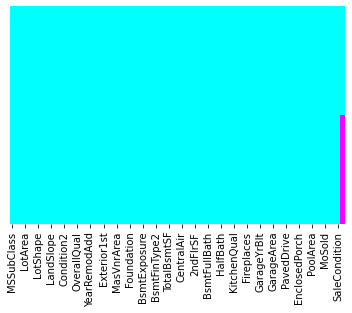

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="cool")

#### As seen above, there is no null value left in the columns(features) of the dataset.

---
### 8- Look into the variables that have only two values: 

In [35]:
binary_vars = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_vars:
    value_counts = df[col].value_counts()
    print(f"{col}:\n{value_counts}")

Street:
Pave    2907
Grvl      12
Name: Street, dtype: int64
CentralAir:
Y    2723
N     196
Name: CentralAir, dtype: int64


In [36]:
del df['Street']

#### Removing "Street" because it does not give much impact to the prediction:
---

### 9- Converting "SalePrice" values to get rid of skewed distribution

In [37]:
y = df1["SalePrice"]
y = np.log(y+1)

---
### Kruskal-Wallis Test (removed)

In [38]:
#train_df = df[:1460]

In [39]:
# #Now check other variables that have more than 3 unique values  
# #I will use the Kruskal-Wallis test to select the top 5 variables with more significant difference 

#more_than_3_vars = [col for col in train_df.columns if train_df[col].nunique() > 3]

#categorical_3_vars = [col for col in more_than_3_vars if train_df[col].dtype == 'object']

In [40]:
#print(categorical_3_vars)

In [41]:
#for var in categorical_3_vars:
#    groups = []
#    for category in train_df['SalePrice'].unique():
#        group = train_df[train_df['SalePrice'] == category][var]
#        groups.append(group)
    
    # Perform Kruskal-Wallis test
#    _, p_value = stats.kruskal(*groups)
    
#    print(f"Variable: {var}")
#    print(f"Kruskal-Wallis p-value: {p_value}\n")

In [42]:
#significant_vars = []

## Perform Kruskal-Wallis test on each variable
#for var in categorical_3_vars:
#    groups = []
#    for category in train_df['SalePrice'].unique():
#        group = train_df[train_df['SalePrice'] == category][var]
#        groups.append(group)
#    
#    # Perform Kruskal-Wallis test
#    _, p_value = stats.kruskal(*groups)
    
#    if p_value < 0.05:
#        significant_vars.append(var)

# Sort the significant_vars based on their p-values
#significant_vars.sort(key=lambda x: stats.kruskal(*[train_df[train_df['SalePrice'] == category][x] for category in train_df['SalePrice'].unique()])[1])

# Choose the top 5 variables
#top_vars = significant_vars[:10]

#print("Top 10 variables:")
#print(top_vars)

# I will drop the categorical columns, except for the 10 most effective categorical columns we found here, from our data set, but first, let's
# determine the columns with the highest correlation of the columns with continuous values, then we can do the column drop process together.

### Correlation Table

In [43]:
#train_df = df[:1460]
#plt.figure(figsize= (18,16))
#sns.heatmap(train_df.corr(),annot=True, linewidth=.7)

In [1]:
#corr = train_df.corr()

#highly_correlation_var = corr.index[abs(corr['SalePrice'])>0.4]

#highly_correlation_var # features with high correlation

In [2]:
#plt.figure(figsize= (18,16))
#sns.heatmap(train_df[highly_correlation_var].corr(),annot=True, linewidth=1)
# * *Multicollinearity occurs when independent variables in a regression model are strongly correlated, leading
#to problems in estimating accurate coefficients and interpreting their individual effects on the dependent variable.*

In [46]:
#drop_cols = set(df.columns) - set(highly_correlation_var)

#drop_cols = set(df.columns) - set(top_vars) - set(highly_correlation_var)

#df = df.drop(drop_cols, axis=1)

In [47]:
#del df['TotalBsmtSF']
#del df['TotRmsAbvGrd']

---
## Exploring Outliers and Deleting by Multiple Methods

In [48]:
train_df = df[:1460]
test_df = df[1460:]
train_dummies = pd.get_dummies(df.drop(["SalePrice"], axis=1)).iloc[:1460]
test_dummies = pd.get_dummies(df.drop("SalePrice", axis=1)).iloc[1460:]

---
### Ridge

In [49]:
rr = Ridge(alpha=10)
rr.fit(train_dummies, y)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.13895400054480458

In [50]:
y_pred = rr.predict(train_dummies)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  30,   66,   88,  142,  181,  277,  328,  365,  410,  438,  462,
        495,  523,  533,  588,  628,  632,  681,  688,  710,  714,  728,
        738,  774,  812,  874,  898,  916,  935,  968,  970, 1062, 1168,
       1181, 1298, 1324, 1383, 1423, 1432, 1453], dtype=int64)

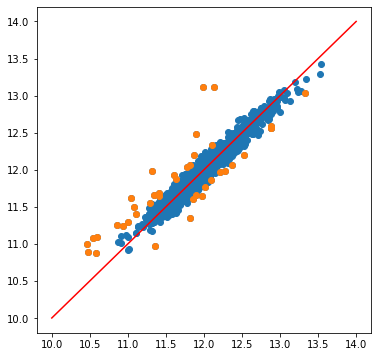

In [51]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers1], y_pred[outliers1])
plt.plot(range(10, 15), range(10, 15), color="red")

---
### ElasticNet

In [52]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(train_dummies, y)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.13895400054480458

In [53]:
y_pred = er.predict(train_dummies)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers2 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers2

array([  30,   88,  142,  277,  328,  410,  457,  462,  495,  523,  533,
        588,  628,  632,  666,  681,  688,  710,  711,  714,  728,  738,
        774,  803,  812,  874,  898,  916,  968,  970, 1181, 1298, 1324,
       1383, 1423, 1432, 1453], dtype=int64)

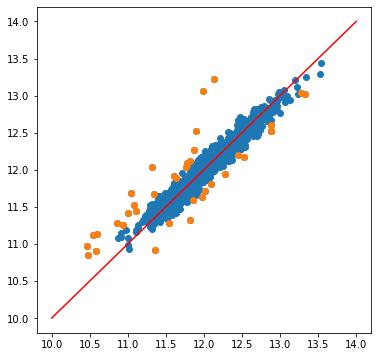

In [54]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers2], y_pred[outliers2])
plt.plot(range(10, 15), range(10, 15), color="red")

---
### Using the ElasticNet and Ridge methods together, I use the intersection of the results of both as outliers:

In [55]:
outliers = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outliers.append(i)
outliers

[30,
 88,
 142,
 277,
 328,
 410,
 462,
 495,
 523,
 533,
 588,
 628,
 632,
 681,
 688,
 710,
 714,
 728,
 738,
 774,
 812,
 874,
 898,
 916,
 968,
 970,
 1181,
 1298,
 1324,
 1383,
 1423,
 1432,
 1453]

### Now we can delete our outliers:

In [56]:
train_df = train_df.drop([
 30,
 88,
 142,
 277,
 328,
 410,
 462,
 495,
 523,
 533,
 588,
 628,
 632,
 681,
 688,
 710,
 714,
 728,
 738,
 774,
 812,
 874,
 898,
 916,
 968,
 970,
 1181,
 1298,
 1324,
 1383,
 1423,
 1432,
 1453])

y = train_df["SalePrice"]
y = np.log(y+1)

In [57]:
df = pd.concat([train_df, test_df]) # dataframes are combined

In [58]:
df.shape # final form shape of df(our data)

(2886, 76)

In [59]:
train_df.shape

(1427, 76)

In [60]:
train_df.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115,None,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2.0,480,TA,TA,Y,40,30,0,320,0,0,None,700,10,2009,WD,Normal,143000.0


In [61]:
test_df.shape

(1459, 76)

In [62]:
test_df.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,0,6,2010,WD,Normal,NaN
1,20,RL,81.0,14267,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,12500,6,2010,WD,Normal,NaN
2,60,RL,74.0,13830,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,0,3,2010,WD,Normal,NaN
3,60,RL,78.0,9978,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,0,6,2010,WD,Normal,NaN
4,120,RL,43.0,5005,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,0,1,2010,WD,Normal,NaN
5,60,RL,75.0,10000,None,IR1,Lvl,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,None,0,4,2010,WD,Normal,NaN


---
## IQR Outlier Deleting (removed)
#### *(I removed it because I thought it wasn't efficient enough.)*

In [63]:
# Min-Max Normalization 

#scaler = MinMaxScaler()

#num_cols = [col for col in train_df.columns if train_df[col].dtype in ['int64', 'float64']]

#for col in num_cols:
#    train_df[col] = scaler.fit_transform(train_df[[col]])

In [64]:
#plt.figure(figsize=(20,7))
#sns.boxplot(data=train_df)

In [65]:
#columns = ["OverallQual" , "MasVnrArea" , "1stFlrSF" , "Fireplaces" , "GarageCars"]

#def remove_outliers(train_df, col_name):
#    q1 = train_df[col_name].quantile(0.25)
#    q3 = train_df[col_name].quantile(0.75)
#    iqr = q3 - q1
#    lower_bound = q1 - 1.5 * iqr
#    upper_bound = q3 + 1.5 * iqr
#    train_df = train_df[(train_df[col_name] >= lower_bound) & (train_df[col_name] <= upper_bound)]
#    return train_df
#
#for col_name in columns:
#    train_df = remove_outliers(train_df, col_name)

In [66]:
#plt.figure(figsize=(20,7))
#sns.boxplot(data=train_df)

In [67]:
# Min-Max Normalization 

#scaler = MinMaxScaler()

#num_cols = [col for col in test_df.columns if test_df[col].dtype in ['int64', 'float64']]

#for col in num_cols:
#    test_df[col] = scaler.fit_transform(test_df[[col]])

In [68]:
#plt.figure(figsize=(20,7))
#sns.boxplot(data=test_df)

---
## Label Encoding (removed)
#### *I had more successful results with the dummy variables, so I used it instead of this method.

In [69]:
#train_df.head()

In [70]:
#categoric_cols = df.select_dtypes(include=['object']).columns.tolist()
#print(categoric_cols)

In [71]:
#label_encoder = preprocessing.LabelEncoder()

#for col in categoric_cols:
#    df[col] = label_encoder.fit_transform(df[col])
#    print(f"Unique values for {col}: {df[col].unique()}")

---
## IV- Modeling

In [88]:
train_dummies = pd.get_dummies(df.drop(["SalePrice"], axis=1)).iloc[:1427]
test_dummies = pd.get_dummies(df.drop(["SalePrice"], axis=1)).iloc[1427:]

---
### Gradient Boosting

In [74]:
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=150)
gbr.fit(train_dummies, y)
np.sqrt(-cross_val_score(gbr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.1014224190140498

---
### XGBoost(removed)
#### *(I tried to add XGBoost to the model, but I got some errors that I couldn't solve, so I decided to remove it from the model.)*

In [78]:
#xgbr = XGBRegressor(max_depth=5, n_estimators=400)
#xgbr.fit(train_dummies, y)
#np.sqrt(-cross_val_score(xgbr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

---
### Lasso

In [79]:
lsr = Lasso(alpha=0.00047)
lsr.fit(train_dummies, y)
np.sqrt(-cross_val_score(lsr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.09063301699074658

---
### Ridge

In [80]:
rr = Ridge(alpha=13)
rr.fit(train_dummies, y)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.09160753678146014

---
## Combined model

In [86]:
train_predict = 0.2 * gbr.predict(train_dummies) + 0.4 * lsr.predict(train_dummies) + 0.4 * rr.predict(train_dummies)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

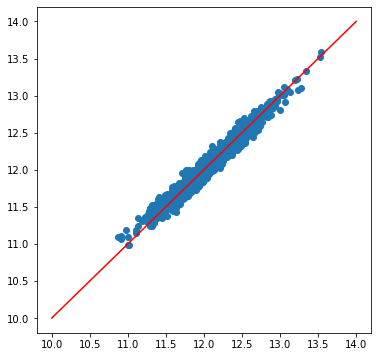

In [87]:
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

## Prediction and Submission

In [85]:
test_predict = 0.2 * gbr.predict(test_dummies) + 0.4 * lsr.predict(test_dummies) + 0.4 * rr.predict(test_dummies)
q1 = pd.DataFrame(test_predict).quantile(0.0042)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.96
test_predict = np.array(pre_df.SalePrice)
sample_submission["SalePrice"] = np.exp(test_predict)-1
sample_submission.to_csv("myhpsubmission.csv", index=False)